In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install scikit-learn
!pip install scipy
!pip install wordcloud
!pip install nltk

In [25]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load file JSON
data_phones = []
with open('Cell_Phones_and_Accessories_5.json', 'r') as f:
    for line in f:
        data_phones.append(json.loads(line))
phones_df = pd.DataFrame(data_phones)
phones_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN


In [6]:
# Load file JSON
data_electronic = []
with open('Electronics_5.json', 'r') as f:
    for line in f:
        data_electronic.append(json.loads(line))
electronic_df = pd.DataFrame(data_electronic)
electronic_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


# **EDA**

## **Phones Dataset**

In [7]:
phones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1128437 non-null  float64
 1   verified        1128437 non-null  bool   
 2   reviewTime      1128437 non-null  object 
 3   reviewerID      1128437 non-null  object 
 4   asin            1128437 non-null  object 
 5   style           605241 non-null   object 
 6   reviewerName    1128302 non-null  object 
 7   reviewText      1127672 non-null  object 
 8   summary         1127920 non-null  object 
 9   unixReviewTime  1128437 non-null  int64  
 10  vote            92034 non-null    object 
 11  image           27107 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [8]:
phones_df.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              523196
reviewerName          135
reviewText            765
summary               517
unixReviewTime          0
vote              1036403
image             1101330
dtype: int64

In [9]:
phones_df.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


### **Distribusi Rating (overall) Phones Dataset**

C:\Users\ACER\AppData\Local\Temp\ipykernel_3548\777790487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=phones_df, palette='viridis')


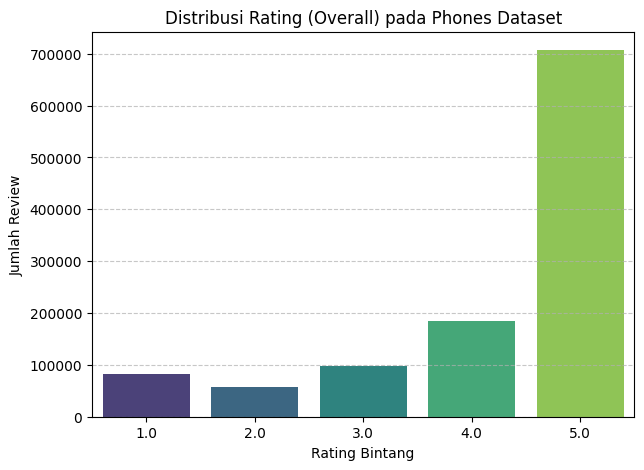

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(x='overall', data=phones_df, palette='viridis')
plt.title('Distribusi Rating (Overall) pada Phones Dataset')
plt.xlabel('Rating Bintang')
plt.ylabel('Jumlah Review')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Jumlah Review per Reviewer (Top 20) Phones Dataset**

C:\Users\ACER\AppData\Local\Temp\ipykernel_3548\2812277900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviewer_review_counts.head(10).index, y=reviewer_review_counts.head(10).values, palette='plasma')


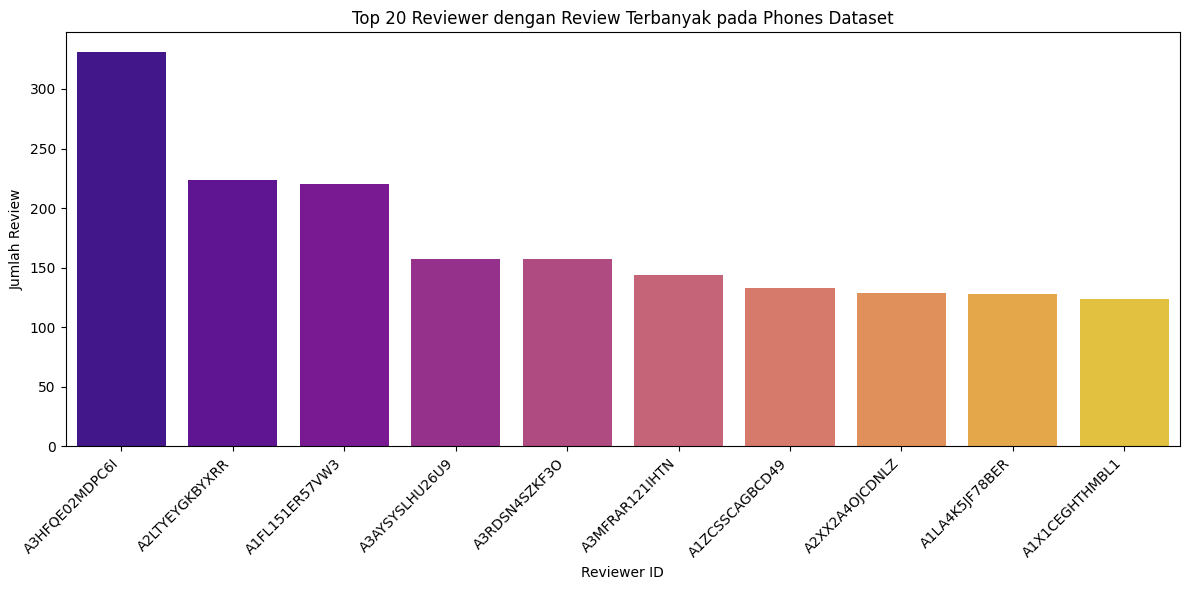

In [11]:
reviewer_review_counts = phones_df['reviewerID'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=reviewer_review_counts.head(10).index, y=reviewer_review_counts.head(10).values, palette='plasma')
plt.title('Top 20 Reviewer dengan Review Terbanyak pada Phones Dataset')
plt.xlabel('Reviewer ID')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Panjang Review Text Phones Dataset**

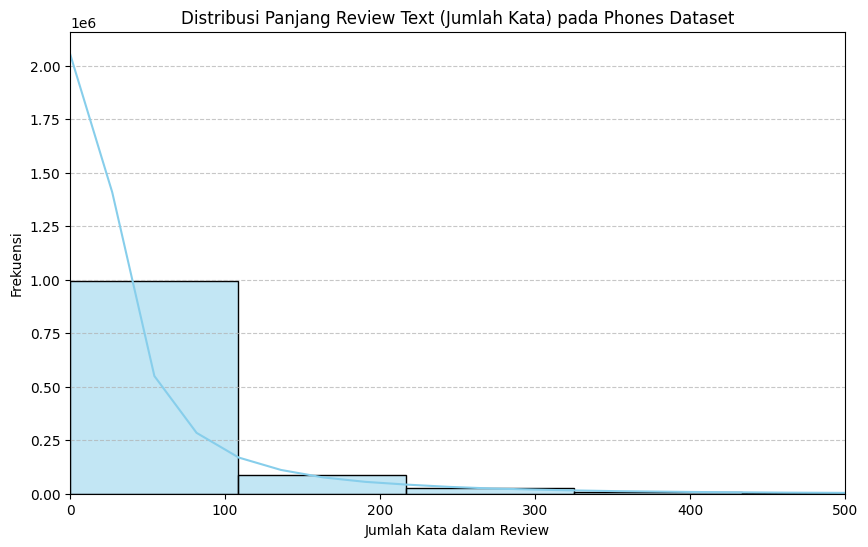

In [12]:
phones_df['reviewText_length'] = phones_df['reviewText'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(phones_df['reviewText_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Panjang Review Text (Jumlah Kata) pada Phones Dataset')
plt.xlabel('Jumlah Kata dalam Review')
plt.ylabel('Frekuensi')
plt.xlim(0, 500)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Memeriksa kolom 'verified' Phones Dataset**

C:\Users\ACER\AppData\Local\Temp\ipykernel_3548\2434664133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='verified', data=phones_df, palette='pastel')


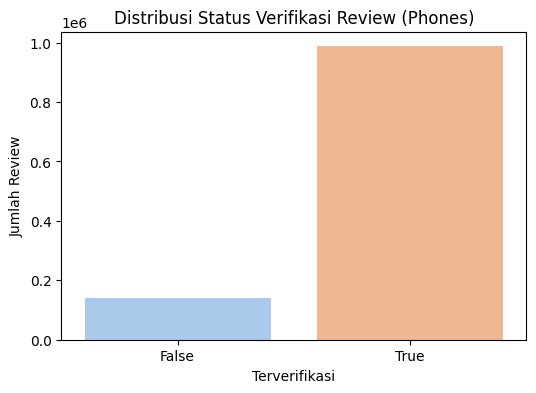

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='verified', data=phones_df, palette='pastel')
plt.title('Distribusi Status Verifikasi Review (Phones)')
plt.xlabel('Terverifikasi')
plt.ylabel('Jumlah Review')
plt.show()

## **Electronic Dataset**

In [14]:
electronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739590 entries, 0 to 6739589
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   vote            object 
 2   verified        bool   
 3   reviewTime      object 
 4   reviewerID      object 
 5   asin            object 
 6   style           object 
 7   reviewerName    object 
 8   reviewText      object 
 9   summary         object 
 10  unixReviewTime  int64  
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 572.0+ MB


In [15]:
electronic_df.isnull().sum()

overall                 0
vote              5790916
verified                0
reviewTime              0
reviewerID              0
asin                    0
style             3192170
reviewerName          925
reviewText           1353
summary               812
unixReviewTime          0
image             6619632
dtype: int64

In [16]:
electronic_df.describe()

,overall,unixReviewTime
count,6.739590e+06,6.739590e+06
mean,4.267668e+00,1.424247e+09
std,1.204419e+00,7.309185e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.393373e+09
50%,5.000000e+00,1.437005e+09
75%,5.000000e+00,1.473552e+09
max,5.000000e+00,1.538611e+09


### **Distribusi Rating (overall) Electronic Dataset**

C:\Users\ACER\AppData\Local\Temp\ipykernel_3548\935021173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=electronic_df, palette='viridis')


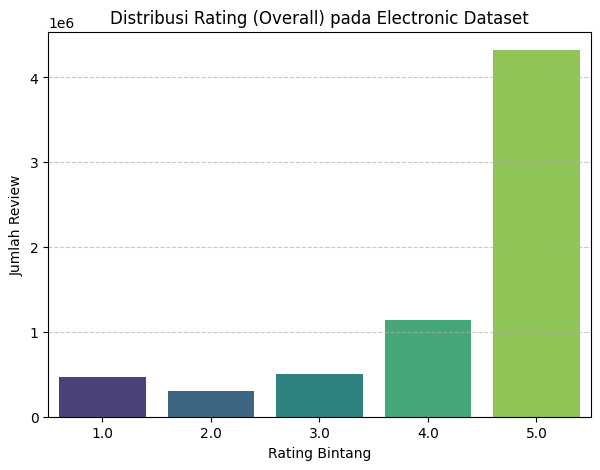

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(x='overall', data=electronic_df, palette='viridis')
plt.title('Distribusi Rating (Overall) pada Electronic Dataset')
plt.xlabel('Rating Bintang')
plt.ylabel('Jumlah Review')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Jumlah Review per Reviewer (Top 20) Electronic Dataset**

C:\Users\ACER\AppData\Local\Temp\ipykernel_3548\3799465731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviewer_review_counts_elec.head(10).index, y=reviewer_review_counts_elec.head(10).values, palette='plasma')


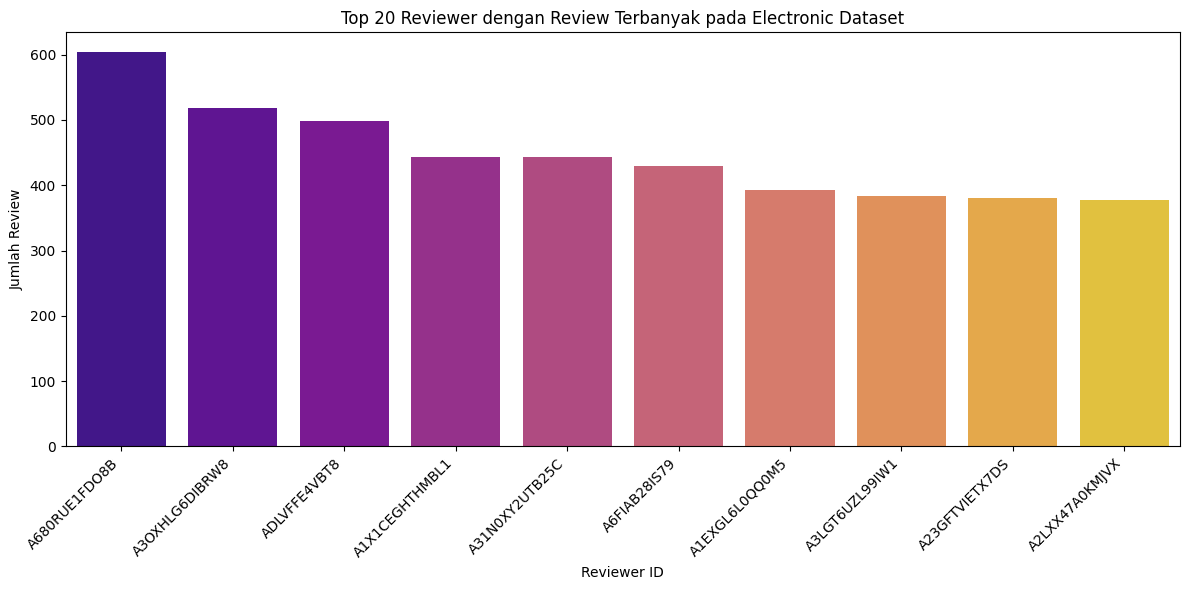

In [18]:
reviewer_review_counts_elec = electronic_df['reviewerID'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=reviewer_review_counts_elec.head(10).index, y=reviewer_review_counts_elec.head(10).values, palette='plasma')
plt.title('Top 20 Reviewer dengan Review Terbanyak pada Electronic Dataset')
plt.xlabel('Reviewer ID')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Panjang Review Text Electronic Dataset**

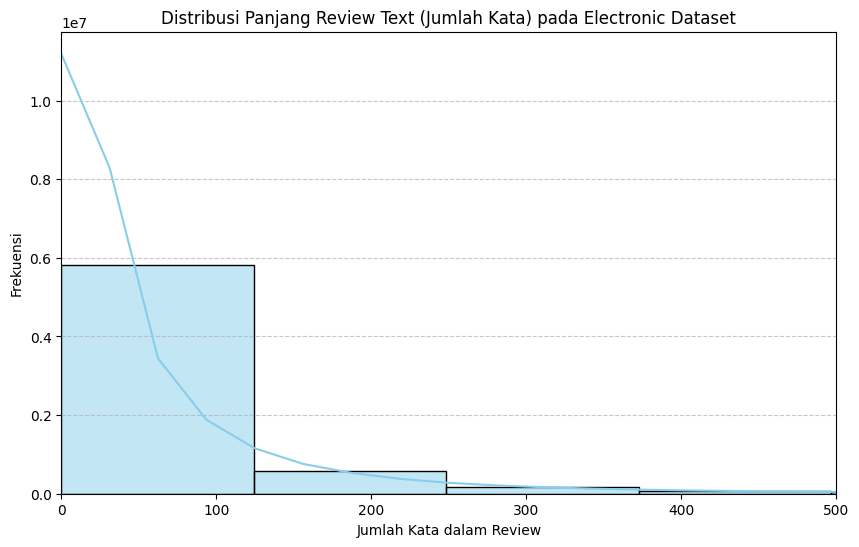

In [19]:
electronic_df['reviewText_length'] = electronic_df['reviewText'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(electronic_df['reviewText_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Panjang Review Text (Jumlah Kata) pada Electronic Dataset')
plt.xlabel('Jumlah Kata dalam Review')
plt.ylabel('Frekuensi')
plt.xlim(0, 500)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Memeriksa kolom 'verified' Phones Dataset**

C:\Users\ACER\AppData\Local\Temp\ipykernel_3548\1487721684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='verified', data=electronic_df, palette='pastel')


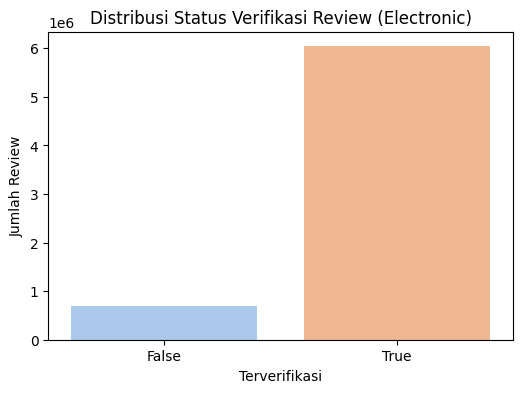

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='verified', data=electronic_df, palette='pastel')
plt.title('Distribusi Status Verifikasi Review (Electronic)')
plt.xlabel('Terverifikasi')
plt.ylabel('Jumlah Review')
plt.show()

# **Preprocessing**

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [22]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"(https?://\S+|www\.\S+|\bhttps\b|\bt\b|\bco\b|[^a-zA-Z\s]|\b\w{1,2}\b)", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    filtered = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(filtered)

In [26]:
def preprocess_dataframe(df, df_name):
    # Kolom yang akan didrop
    columns_to_drop = ['reviewerName', 'style', 'vote', 'image']
    # Lakukan dropping kolom
    for col in columns_to_drop:
        if col in df.columns:
            df = df.drop(columns=[col])
            print(f"Kolom '{col}' didrop dari {df_name}.")
        else:
            print(f"Kolom '{col}' tidak ditemukan di {df_name}, dilewati.")

    # Penanganan Nilai Hilang
    df['reviewText'] = df['reviewText'].fillna('')
    df['summary'] = df['summary'].fillna('')
    
    # Konversi Tipe Data & Feature Engineering Dasar
    df['reviewTime_dt'] = pd.to_datetime(df['unixReviewTime'], unit='s', errors='coerce')
    df = df.dropna(subset=['reviewTime_dt'])

    # Ekstraksi Fitur Waktu
    df['review_year'] = df['reviewTime_dt'].dt.year
    df['review_month'] = df['reviewTime_dt'].dt.month
    df['review_dayofweek'] = df['reviewTime_dt'].dt.dayofweek
    df['review_hour'] = df['reviewTime_dt'].dt.hour

    # Feature: Panjang reviewText (jumlah kata)
    df['reviewText_length'] = df['reviewText'].apply(lambda x: len(str(x).split()))
    # Feature: Panjang summary (jumlah kata)
    df['summary_length'] = df['summary'].apply(lambda x: len(str(x).split()))

    # Preprocessing Review
    df['full_review_text'] = df['reviewText'] + " " + df['summary']
    df['processed_text'] = df['full_review_text'].apply(preprocess_text)

    # Fitur Agregasi Tingkat Reviewer
    # Jumlah review oleh reviewer
    reviewer_review_counts = df['reviewerID'].value_counts()
    df['reviews_by_reviewer'] = df['reviewerID'].map(reviewer_review_counts)

    # Rata-rata rating oleh reviewer
    reviewer_avg_rating = df.groupby('reviewerID')['overall'].mean()
    df['avg_rating_by_reviewer'] = df['reviewerID'].map(reviewer_avg_rating)

    # Standar deviasi rating oleh reviewer (untuk melihat konsistensi)
    reviewer_std_rating = df.groupby('reviewerID')['overall'].std().fillna(0)
    df['std_rating_by_reviewer'] = df['reviewerID'].map(reviewer_std_rating)

    # Jumlah produk unik yang di-review oleh reviewer
    reviewer_unique_products = df.groupby('reviewerID')['asin'].nunique()
    df['unique_products_by_reviewer'] = df['reviewerID'].map(reviewer_unique_products)

    columns_to_clean_up = ['unixReviewTime', 'reviewTime_dt', 'reviewText', 'summary', 'full_review_text']
    for col in columns_to_clean_up:
        if col in df.columns:
            df = df.drop(columns=[col])
            print(f"Kolom '{col}' dibersihkan dari {df_name}.")
        else:
            print(f"Kolom '{col}' tidak ditemukan di {df_name}, dilewati saat pembersihan.")
    
    return df

## **Phones Dataset**

In [27]:
phones_df = preprocess_dataframe(phones_df, "phones_df")

Kolom 'reviewerName' didrop dari phones_df.
Kolom 'style' didrop dari phones_df.
Kolom 'vote' didrop dari phones_df.
Kolom 'image' didrop dari phones_df.
Kolom 'unixReviewTime' dibersihkan dari phones_df.
Kolom 'reviewTime_dt' dibersihkan dari phones_df.
Kolom 'reviewText' dibersihkan dari phones_df.
Kolom 'summary' dibersihkan dari phones_df.
Kolom 'full_review_text' dibersihkan dari phones_df.


In [28]:
phones_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText_length,review_year,review_month,review_dayofweek,review_hour,summary_length,processed_text,reviews_by_reviewer,avg_rating_by_reviewer,std_rating_by_reviewer,unique_products_by_reviewer
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,49,2014,8,0,0,7,look even better person careful drop phone oft...,5,4.400000,0.894427,5
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,22,2014,2,2,0,1,want spend whole lot cash want great deal shop...,6,5.000000,0.000000,6
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,51,2014,2,5,0,2,case came time love design actually missing st...,5,4.600000,0.894427,5
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,20,2014,2,1,0,1,care gave gift okay expected case,17,3.647059,1.656094,17
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,31,2014,2,0,0,1,liked cute stud fall easily protect phone woul...,32,4.218750,0.659148,31


## **Electronic Dataset**

In [29]:
electronic_df = preprocess_dataframe(electronic_df, "electronic_df")

Kolom 'reviewerName' didrop dari electronic_df.
Kolom 'style' didrop dari electronic_df.
Kolom 'vote' didrop dari electronic_df.
Kolom 'image' didrop dari electronic_df.


KeyboardInterrupt: 

In [ ]:
electronic_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText_length,review_year,review_month,review_dayofweek,review_hour,summary_length,processed_text,reviews_by_reviewer,avg_rating_by_reviewer,std_rating_by_reviewer,unique_products_by_reviewer
0,5.0,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,184,1999,9,5,0,4,best novel read year everything fiction beauti...,7,5.000000,0.000000,7
1,3.0,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,79,2013,10,2,0,5,page page introspection style writer like henr...,5,2.400000,1.673320,5
2,5.0,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,365,2008,9,1,0,13,kind novel read time lose book day possibly we...,45,4.288889,0.920035,44
3,5.0,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,217,2000,9,0,0,8,gorgeous language incredible writer last life ...,8,4.625000,0.744024,7
4,3.0,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,258,2000,2,4,0,4,taken review compared book leopard promised bi...,7,1.714286,0.951190,6


## **Combine Dataset**

In [ ]:
df_combined = pd.concat([phones_df, electronic_df], ignore_index=True)
df_combined

,overall,verified,reviewTime,reviewerID,asin,reviewText_length,review_year,review_month,review_dayofweek,review_hour,summary_length,processed_text,reviews_by_reviewer,avg_rating_by_reviewer,std_rating_by_reviewer,unique_products_by_reviewer
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,49,2014,8,0,0,7,look even better person careful drop phone oft...,5,4.400000,0.894427,5
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,22,2014,2,2,0,1,want spend whole lot cash want great deal shop...,6,5.000000,0.000000,6
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,51,2014,2,5,0,2,case came time love design actually missing st...,5,4.600000,0.894427,5
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,20,2014,2,1,0,1,care gave gift okay expected case,17,3.647059,1.656094,17
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,31,2014,2,0,0,1,liked cute stud fall easily protect phone woul...,32,4.218750,0.659148,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868022,4.0,True,"03 21, 2017",A33MAQA919J2V8,B01HJH40WU,9,2017,3,1,0,2,seem like quality usb cable time tell four star,9,4.111111,0.927961,9
7868023,4.0,True,"01 9, 2017",A1AKHSCPD1BHM4,B01HJH40WU,29,2017,1,0,0,3,work great love longer cord cord buy last long...,11,4.909091,0.301511,11
7868024,5.0,True,"12 1, 2016",A2HUZO7MQAY5I2,B01HJH40WU,111,2016,12,3,0,9,odd thing happened clicked sale item ft ft ft ...,5,4.200000,1.788854,5
7868025,5.0,True,"11 29, 2016",AJJ7VX2L91X2W,B01HJH40WU,2,2016,11,1,0,2,work well five star,18,5.000000,0.000000,18


# **Feature Engineering**

In [ ]:
if not df_combined.empty:
    def feature_engineering(df):
        print(f"\n--- Memulai Advanced Feature Engineering dan Agregasi (Optimized) ---")

        # 1. Feature Engineering Kesamaan Teks (Duplikasi Langsung)
        print("Membuat fitur duplikasi teks (lebih cepat dari TF-IDF similarity loop)...")
        
        df['is_self_duplicate_text'] = df.duplicated(subset=['reviewerID', 'processed_text'], keep=False) & (df['processed_text'] != '')
        df['is_global_duplicate_text'] = df.duplicated(subset=['processed_text'], keep=False) & (df['processed_text'] != '')

        prop_self_duplicate = df.groupby('reviewerID')['is_self_duplicate_text'].mean().fillna(0)
        df['prop_self_duplicate_text'] = df['reviewerID'].map(prop_self_duplicate)

        prop_global_duplicate = df.groupby('reviewerID')['is_global_duplicate_text'].mean().fillna(0)
        df['prop_global_duplicate_text'] = df['reviewerID'].map(prop_global_duplicate)

        print("Fitur duplikasi teks selesai.")

        # 2. Agregasi Fitur Non-Teks ke Tingkat Reviewer
        print("Mengagregasi fitur non-teks ke tingkat reviewer...")

        if 'reviewTime_dt' in df.columns and pd.api.types.is_datetime64_any_dtype(df['reviewTime_dt']):
            df = df.sort_values(by=['reviewerID', 'reviewTime_dt'])
            df['time_diff_prev_review'] = df.groupby('reviewerID')['reviewTime_dt'].diff().dt.total_seconds() / (3600 * 24)
            
            reviewer_time_diff_mean = df.groupby('reviewerID')['time_diff_prev_review'].mean().fillna(0)
            df['avg_time_between_reviews'] = df['reviewerID'].map(reviewer_time_diff_mean)
            
            reviewer_time_diff_std = df.groupby('reviewerID')['time_diff_prev_review'].std().fillna(0)
            df['std_time_between_reviews'] = df['reviewerID'].map(reviewer_time_diff_std)
        else:
            print("Kolom 'reviewTime_dt' tidak valid atau tidak ditemukan, melewati fitur kecepatan review.")
            df['avg_time_between_reviews'] = 0.0
            df['std_time_between_reviews'] = 0.0

        # Fungsi calculate_entropy tidak dipanggil di sini karena tidak digunakan
        # def calculate_entropy(series):
        #     if len(series) == 0:
        #         return 0
        #     probabilities = series.value_counts(normalize=True)
        #     entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9))
        #     return entropy

        agg_features = {
            'reviews_by_reviewer': 'first',
            'avg_rating_by_reviewer': 'first',
            'std_rating_by_reviewer': 'first',
            'unique_products_by_reviewer': 'first',
            # 'helpfulness_ratio': 'mean', # <-- Dihapus
            'reviewText_length': 'mean',
            'summary_length': 'mean',
            # Menambahkan 'overall_mean' dan 'overall_std' saja, tanpa entropi
            'overall': ['mean', 'std'], 
            'review_year': ['min', 'max'],
            'review_month': ['mean', 'std'],
            'review_dayofweek': ['mean', 'std'],
            'review_hour': ['mean', 'std'],
            # 'rating_entropy_by_reviewer': 'first', # <-- Dihapus
            'prop_self_duplicate_text': 'first',
            'prop_global_duplicate_text': 'first'
        }
        
        if 'verified' in df.columns:
            reviewer_verified_ratio = df.groupby('reviewerID')['verified'].apply(lambda x: (x == True).sum() / len(x)).fillna(0)
            df['verified_review_ratio'] = df['reviewerID'].map(reviewer_verified_ratio)
            agg_features['verified_review_ratio'] = 'first'
        
        if 'avg_time_between_reviews' in df.columns:
            agg_features['avg_time_between_reviews'] = 'first'
            agg_features['std_time_between_reviews'] = 'first'


        reviewer_features = df.groupby('reviewerID').agg(agg_features)
        
        reviewer_features.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in reviewer_features.columns.values]
        reviewer_features = reviewer_features.reset_index()

        final_reviewer_df = reviewer_features.fillna(0)

        print(f"Ukuran final reviewer DataFrame: {final_reviewer_df.shape}")
        print(f"Kolom final reviewer DataFrame: {final_reviewer_df.columns.tolist()}")
        print("\nHead final reviewer DataFrame:")
        print(final_reviewer_df.head())

        return final_reviewer_df

In [ ]:
final_reviewer_df = feature_engineering(df_combined)


--- Memulai Advanced Feature Engineering dan Agregasi (Optimized) ---
Membuat fitur duplikasi teks (lebih cepat dari TF-IDF similarity loop)...
Fitur duplikasi teks selesai.
Mengagregasi fitur non-teks ke tingkat reviewer...
Kolom 'reviewTime_dt' tidak valid atau tidak ditemukan, melewati fitur kecepatan review.
Ukuran final reviewer DataFrame: (802699, 22)
Kolom final reviewer DataFrame: ['reviewerID', 'reviews_by_reviewer_first', 'avg_rating_by_reviewer_first', 'std_rating_by_reviewer_first', 'unique_products_by_reviewer_first', 'reviewText_length_mean', 'summary_length_mean', 'overall_mean', 'overall_std', 'review_year_min', 'review_year_max', 'review_month_mean', 'review_month_std', 'review_dayofweek_mean', 'review_dayofweek_std', 'review_hour_mean', 'review_hour_std', 'prop_self_duplicate_text_first', 'prop_global_duplicate_text_first', 'verified_review_ratio_first', 'avg_time_between_reviews_first', 'std_time_between_reviews_first']

Head final reviewer DataFrame:
             r

## **Feature Standardization**

In [ ]:
# Pisahkan kolom yang tidak ingin distandarisasi (misalnya 'reviewerID' sebagai identifier)
identifier_column = 'reviewerID'
feature_columns = final_reviewer_df.columns.difference([identifier_column])

In [ ]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standardisasi ke kolom fitur numerik
final_reviewer_df_scaled_values = scaler.fit_transform(final_reviewer_df[feature_columns])

# Buat DataFrame hasil scaling
final_reviewer_df_scaled = pd.DataFrame(final_reviewer_df_scaled_values, columns=feature_columns)

# Gabungkan kembali dengan kolom identifier (jika diperlukan)
final_reviewer_df_scaled[identifier_column] = final_reviewer_df[identifier_column].values

# Atur ulang urutan kolom agar reviewerID di depan
cols = [identifier_column] + [col for col in final_reviewer_df_scaled.columns if col != identifier_column]
final_reviewer_df_scaled = final_reviewer_df_scaled[cols]

In [ ]:
final_reviewer_df_scaled.head()

,reviewerID,avg_rating_by_reviewer_first,avg_time_between_reviews_first,overall_mean,overall_std,prop_global_duplicate_text_first,prop_self_duplicate_text_first,reviewText_length_mean,review_dayofweek_mean,review_dayofweek_std,...,review_month_mean,review_month_std,review_year_max,review_year_min,reviews_by_reviewer_first,std_rating_by_reviewer_first,std_time_between_reviews_first,summary_length_mean,unique_products_by_reviewer_first,verified_review_ratio_first
0,A0001528BGUBOEVR6T5U,0.152775,0.0,0.147647,-0.168662,1.539724,0.722164,-0.711584,0.700368,0.439242,...,-0.157330,-0.252159,-0.877495,0.026385,-0.404699,-0.155756,0.0,-1.339504,-0.562153,0.530792
1,A0003214FKMKJE0PCW3D,1.086929,0.0,1.096277,-1.503302,2.729807,3.493517,-0.810692,-0.696627,-2.111535,...,1.683509,-1.991892,-1.538348,0.379237,0.145433,-1.465780,0.0,-1.186102,-0.184161,0.530792
2,A0008898NGEXICE0F146,1.086929,0.0,1.096277,-1.503302,2.729807,3.493517,-0.825558,1.817964,-2.111535,...,2.143719,-1.991892,-0.877495,0.732089,-0.221321,-1.465780,0.0,-1.186102,-0.184161,0.530792
3,A0009478CBXKUCALUC7U,0.152775,0.0,0.147647,-0.659202,-0.245401,-0.663512,-0.481159,0.281270,1.178336,...,-0.770943,-0.093688,-0.877495,0.379237,-0.404699,-0.637248,0.0,-0.495796,-0.373157,0.530792
4,A00101847G3FJTWYGNQA,0.450006,0.0,0.449484,-0.379435,-0.840443,-0.663512,-0.047112,0.370169,1.017973,...,1.516160,-0.938121,-0.216643,0.026385,0.512187,-0.362641,0.0,-0.433041,0.571823,0.530792


# **Modeling**

In [ ]:
# Pisahkan fitur dari identifier
features = final_reviewer_df_scaled.drop('reviewerID', axis=1)
reviewer_ids = final_reviewer_df_scaled['reviewerID']

In [ ]:
# Inisialisasi Model
iso_forest = IsolationForest(n_estimators=100, 
                             contamination=0.05, 
                             max_features=1.0,
                             random_state=42)

# Latih model dan lakukan prediksi
predictions = iso_forest.fit_predict(features)

# Hitung skor anomali
anomaly_scores = iso_forest.decision_function(features)

In [ ]:
# Buat salinan DataFrame asli untuk menyimpan hasil agar tidak mengubah data asli
results_df = final_reviewer_df.copy()

In [ ]:
# Tambahkan kolom skor dan label anomali
results_df['anomaly_score'] = anomaly_scores
results_df['anomaly_label'] = predictions

results_df.head()

,reviewerID,reviews_by_reviewer_first,avg_rating_by_reviewer_first,std_rating_by_reviewer_first,unique_products_by_reviewer_first,reviewText_length_mean,summary_length_mean,overall_mean,overall_std,review_year_min,...,review_dayofweek_std,review_hour_mean,review_hour_std,prop_self_duplicate_text_first,prop_global_duplicate_text_first,verified_review_ratio_first,avg_time_between_reviews_first,std_time_between_reviews_first,anomaly_score,anomaly_label
0,A0001528BGUBOEVR6T5U,6,4.333333,0.816497,5,8.666667,1.666667,4.333333,0.816497,2013,...,1.861899,0.0,0.0,0.333333,0.666667,1.0,0.0,0.0,0.132786,1
1,A0003214FKMKJE0PCW3D,9,5.000000,0.000000,7,2.000000,2.000000,5.000000,0.000000,2014,...,0.000000,0.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.011123,1
2,A0008898NGEXICE0F146,7,5.000000,0.000000,7,1.000000,2.000000,5.000000,0.000000,2015,...,0.000000,0.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.007114,1
3,A0009478CBXKUCALUC7U,6,4.333333,0.516398,6,24.166667,3.500000,4.333333,0.516398,2014,...,2.401388,0.0,0.0,0.000000,0.166667,1.0,0.0,0.0,0.146778,1
4,A00101847G3FJTWYGNQA,11,4.545455,0.687552,11,53.363636,3.636364,4.545455,0.687552,2013,...,2.284334,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.127927,1


# **Analisis Hasil Modeling**

## **Menghitung jumlah reviewer normal vs anomali**

In [ ]:
# Menghitung jumlah reviewer normal vs anomali
print("\nJumlah Reviewer Normal (1) vs. Anomali (-1):")
print(results_df['anomaly_label'].value_counts())


Jumlah Reviewer Normal (1) vs. Anomali (-1):
anomaly_label
 1    762564
-1     40135
Name: count, dtype: int64


## **Top 10 Anomali**

In [ ]:
# Saring DataFrame untuk hanya menampilkan anomali
anomalies_df = results_df[results_df['anomaly_label'] == -1]

# Urutkan berdasarkan skor anomali (dari yang paling anomali)
sorted_anomalies = anomalies_df.sort_values(by='anomaly_score', ascending=True)

sorted_anomalies.head(10)

,reviewerID,reviews_by_reviewer_first,avg_rating_by_reviewer_first,std_rating_by_reviewer_first,unique_products_by_reviewer_first,reviewText_length_mean,summary_length_mean,overall_mean,overall_std,review_year_min,...,review_dayofweek_std,review_hour_mean,review_hour_std,prop_self_duplicate_text_first,prop_global_duplicate_text_first,verified_review_ratio_first,avg_time_between_reviews_first,std_time_between_reviews_first,anomaly_score,anomaly_label
421504,A2ZKG6ZY2MWZZR,23,1.0,0.0,23,56.913043,3.434783,1.0,0.0,2007,...,0.0,0.0,0.0,0.913043,0.913043,0.000000,0.0,0.0,-0.197162,-1
227094,A22ICJNN4QESPR,13,1.0,0.0,4,410.000000,9.923077,1.0,0.0,2008,...,0.0,0.0,0.0,0.923077,0.923077,0.000000,0.0,0.0,-0.193297,-1
472236,A386NC1T0JDCQE,6,1.0,0.0,1,227.000000,5.000000,1.0,0.0,2008,...,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,-0.189077,-1
316547,A2HOI4FW3RWJ4Q,5,1.0,0.0,5,370.200000,10.000000,1.0,0.0,2005,...,0.0,0.0,0.0,0.800000,0.800000,0.000000,0.0,0.0,-0.187632,-1
204035,A1YL0XUT0M158Z,9,1.0,0.0,5,449.111111,6.000000,1.0,0.0,2008,...,0.0,0.0,0.0,0.888889,0.888889,0.000000,0.0,0.0,-0.185370,-1
272659,A2A75AZG75OA4M,6,1.0,0.0,6,298.000000,7.000000,1.0,0.0,2008,...,0.0,0.0,0.0,0.833333,0.833333,0.166667,0.0,0.0,-0.177333,-1
252368,A26RMU80LT8YCQ,9,1.0,0.0,7,99.888889,7.000000,1.0,0.0,2007,...,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,-0.177051,-1
232350,A23E0E6ULOXGEJ,5,1.0,0.0,1,214.000000,9.000000,1.0,0.0,2011,...,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,-0.176307,-1
265576,A2900RNJ5THS7C,6,3.0,0.0,2,186.000000,10.333333,3.0,0.0,2009,...,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,-0.176180,-1
673156,ADWZ4I7M2RQUD,10,1.0,0.0,10,105.000000,9.000000,1.0,0.0,2005,...,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,-0.175312,-1


## **Perbandingan Rata-rata Fitur (Anomali vs. Normal)**

In [ ]:
# Bandingkan nilai rata-rata fitur antara dua kelompok
feature_comparison = results_df.groupby('anomaly_label')[features.columns].mean().T

feature_comparison.columns = ['Normal_Mean', 'Anomaly_Mean']
feature_comparison['Difference'] = abs(feature_comparison['Normal_Mean'] - feature_comparison['Anomaly_Mean'])

print("\nPerbandingan Rata-rata Fitur (Anomali vs. Normal):")
print(feature_comparison.sort_values(by='Difference', ascending=False))


Perbandingan Rata-rata Fitur (Anomali vs. Normal):
                                   Normal_Mean  Anomaly_Mean  Difference
reviewText_length_mean              108.188135     53.813985   54.374150
reviews_by_reviewer_first            14.925252      7.853322    7.071930
unique_products_by_reviewer_first    14.094855      7.652289    6.442566
review_year_min                    2011.381438   2013.006476    1.625038
review_year_max                    2015.092986   2016.392814    1.299828
review_month_std                      2.103932      2.741294    0.637362
overall_mean                          3.739078      4.255387    0.516310
avg_rating_by_reviewer_first          3.735666      4.250022    0.514356
summary_length_mean                   5.015268      4.554289    0.460980
review_month_mean                     6.680919      6.324021    0.356898
prop_self_duplicate_text_first        0.449500      0.144355    0.305146
review_dayofweek_std                  1.256205      1.556285    0.300080

# **Testing Data Dummy**

In [ ]:
# Ambil nama kolom fitur untuk memastikan konsistensi
feature_columns = features.columns.tolist()

# Buat list untuk menampung data dummy
dummy_data_list = []
n_samples_per_class = 25

# Generate 25 data ANOMALI
for i in range(n_samples_per_class):
    anomaly_profile = {
        'reviewerID': f'DUMMY_ANOMALY_{i+1}',
        # Ciri utama anomali:
        'reviews_by_reviewer_first': np.random.randint(100, 500),
        'avg_rating_by_reviewer_first': np.random.choice([1.0, 5.0]),
        'std_rating_by_reviewer_first': np.random.uniform(0.0, 0.5),
        'prop_self_duplicate_text_first': np.random.uniform(0.7, 1.0),
        'verified_review_ratio_first': np.random.uniform(0.0, 0.15),
        'avg_time_between_reviews_first': np.random.uniform(0.01, 0.5),
        'std_time_between_reviews_first': np.random.uniform(0.01, 0.2),
        'unique_products_by_reviewer_first': lambda r: r['reviews_by_reviewer_first'] * np.random.uniform(0.1, 0.5),
    }
    # Isi fitur lain dengan nilai rata-rata dari data asli + sedikit noise
    for col in feature_columns:
        if col not in anomaly_profile:
            mean_val = final_reviewer_df[col].mean()
            std_val = final_reviewer_df[col].std()
            anomaly_profile[col] = np.random.normal(loc=mean_val, scale=std_val * np.random.uniform(1.5, 3.0)) # Noise lebih besar untuk anomali

    # Menghitung nilai lambda function
    anomaly_profile['unique_products_by_reviewer_first'] = int(anomaly_profile['unique_products_by_reviewer_first'](anomaly_profile))
    dummy_data_list.append(anomaly_profile)


# Generate 25 data NORMAL
for i in range(n_samples_per_class):
    normal_profile = {
        'reviewerID': f'DUMMY_NORMAL_{i+1}',
        # Ciri utama normal:
        'reviews_by_reviewer_first': np.random.randint(5, 50),
        'avg_rating_by_reviewer_first': np.random.uniform(3.5, 4.9),
        'std_rating_by_reviewer_first': np.random.uniform(0.5, 1.2),
        'prop_self_duplicate_text_first': np.random.uniform(0.0, 0.05),
        'verified_review_ratio_first': np.random.uniform(0.85, 1.0), # Mayoritas terverifikasi
        'avg_time_between_reviews_first': np.random.uniform(20, 200),
        'std_time_between_reviews_first': np.random.uniform(30, 150),
        'unique_products_by_reviewer_first': lambda r: r['reviews_by_reviewer_first'] * np.random.uniform(0.9, 1.0),
    }
    # Isi fitur lain dengan nilai rata-rata dari data asli + sedikit noise
    for col in feature_columns:
        if col not in normal_profile:
            mean_val = final_reviewer_df[col].mean()
            std_val = final_reviewer_df[col].std()
            normal_profile[col] = np.random.normal(loc=mean_val, scale=std_val * 0.1) # Noise kecil untuk normal

    # Menghitung nilai lambda function
    normal_profile['unique_products_by_reviewer_first'] = int(normal_profile['unique_products_by_reviewer_first'](normal_profile))
    dummy_data_list.append(normal_profile)

In [ ]:
# Membuat DataFrame dummy untuk 50 data
dummy_df_50 = pd.DataFrame(dummy_data_list)
dummy_df_50['ground_truth'] = (['Anomaly'] * n_samples_per_class) + (['Normal'] * n_samples_per_class)

In [ ]:
# Pastikan urutan kolom sesuai
dummy_features_df_50 = dummy_df_50[feature_columns]

In [ ]:
# Gunakan scaler yang sama, hanya transform
dummy_features_scaled_50 = scaler.transform(dummy_features_df_50)

In [ ]:
# Gunakan model yang sama
dummy_predictions_50 = iso_forest.predict(dummy_features_scaled_50)

c:\Users\Samuel Chinson\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Analisis hasil
dummy_df_50['model_prediction_label'] = dummy_predictions_50
dummy_df_50['model_prediction'] = np.where(dummy_df_50['model_prediction_label'] == -1, 'Anomaly', 'Normal')
dummy_df_50['status'] = np.where(dummy_df_50['ground_truth'] == dummy_df_50['model_prediction'], '✅ Correct', '❌ Incorrect')

Hasil Pengujian Model dengan 50 Data Dummy (contamination=0.05)
Ringkasan Hasil (Confusion Matrix):


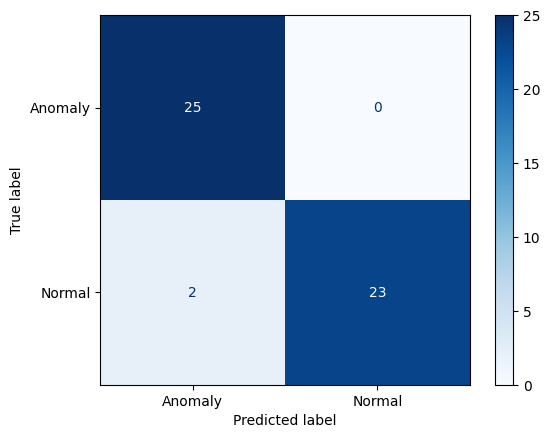

In [ ]:
# --- TAMPILKAN RINGKASAN HASIL ---
print("="*60)
print("Hasil Pengujian Model dengan 50 Data Dummy (contamination=0.05)")
print("="*60)

# Gunakan Confusion Matrix untuk ringkasan yang jelas
print("Ringkasan Hasil (Confusion Matrix):")
cm = confusion_matrix(dummy_df_50['ground_truth'], dummy_df_50['model_prediction'], labels=['Anomaly', 'Normal'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomaly', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Tampilkan statistik
correct_anomalies = ((dummy_df_50['ground_truth'] == 'Anomaly') & (dummy_df_50['status'] == '✅ Correct')).sum()
correct_normals = ((dummy_df_50['ground_truth'] == 'Normal') & (dummy_df_50['status'] == '✅ Correct')).sum()
incorrect_normals = ((dummy_df_50['ground_truth'] == 'Normal') & (dummy_df_50['status'] == '❌ Incorrect')).sum()

print(f"\n- Anomali yang teridentifikasi dengan benar : {correct_anomalies} dari {n_samples_per_class}")
print(f"- Normal yang teridentifikasi dengan benar  : {correct_normals} dari {n_samples_per_class}")
print(f"- Normal yang salah ditandai sebagai Anomali: {incorrect_normals} dari {n_samples_per_class}")


- Anomali yang teridentifikasi dengan benar : 25 dari 25
- Normal yang teridentifikasi dengan benar  : 23 dari 25
- Normal yang salah ditandai sebagai Anomali: 2 dari 25


In [ ]:
# Tampilkan hanya data yang salah diprediksi untuk dianalisis
incorrect_predictions = dummy_df_50[dummy_df_50['status'] == '❌ Incorrect']
if not incorrect_predictions.empty:
    print("\nDetail Data yang Salah Diprediksi:")
    display_cols = ['reviewerID', 'ground_truth', 'model_prediction', 'reviews_by_reviewer_first', 'avg_rating_by_reviewer_first', 'std_rating_by_reviewer_first', 'verified_review_ratio_first']
    print(incorrect_predictions[display_cols])
else:
    print("\nSelamat! Semua data dummy diprediksi dengan benar.")


Detail Data yang Salah Diprediksi:
         reviewerID ground_truth model_prediction  reviews_by_reviewer_first  \
35  DUMMY_NORMAL_11       Normal          Anomaly                         46   
43  DUMMY_NORMAL_19       Normal          Anomaly                         49   

    avg_rating_by_reviewer_first  std_rating_by_reviewer_first  \
35                      4.611500                      0.584863   
43                      4.552243                      0.563642   

    verified_review_ratio_first  
35                     0.954125  
43                     0.940955  
